# Stabla odluka

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

In [3]:
from sklearn.tree import export_graphviz

export_graphviz(
  tree_clf,
  out_file='iris_tree.dot',
  feature_names=iris.feature_names[2:],
  class_names=iris.target_names,
  rounded=True,
  filled=True
)

![Stablo odluke](../img/iris_tree.png)

## Predvidjanja

Vrednost atributa samples racuna na koliko se primera za obuku cvor primenjuje.<br>
Atribut value govori nam na koliko se primera za obuku od svake klase ovaj cvor primenjuje.<br>
Atribut gini cvora meri njegovu necistocu: cvor je cist ako svi primeri za obuku na na koje se cvor primenjuje pripadaju istoj klasi.

### Gini necistoca

$G_i=1-\sum_{k=1}^{n}p_{i,k}^2$<br>
$p_{i,k}$ je udeo primera klase k u ukupnom broju primera za obuku u i-tom cvoru

## Algoritam obuke CART

Ovaj algoritam radi tako sto na osnovu odredjenog svojstva $k$ i praga $t_k$ prvo deli skup za obuku na dva skupa. K i $t_k$ bira tako sto trazi par koji prozivodi najcistije podskupove.

### Funkcija gubitka CART algoritma za klasifikaciju

$J(k,t_k)=\frac{m_{left}}{m}G_{left}+\frac{m_{right}}{m}G_{right}$<br><br>
$G_{left/right}$ -> necistoca levog/desnog podskupa<br>
$m_{left/right}$ -> broj primera u levom/desnom podskupu

Ovaj algoritam radi regukrzivno. Zaustavlja rekurziju kada dosegne maksimalnu dubinu ili ne uspe da nadje podelu koja bi smanjila necistocu

## Gini necistoca ili entropija ?

U masinskom ucenju entropija se cesto koristi kao mera necistoce: entropija jednog skupa je nula kada sadrzi primere samo jedne klase

### Jednacina entropije

$H_i=-\sum_{k=1}^{n}p_{i,k}log_2(p_{i,k})$

Razlika izmedju Gini necistoce i entropije je cesto zanemarljiva jer obe dovode do slicnih stabala.

## Hiperparametri regularizacije

Stabla odluke nemaju ogranicen broj parametara kao na primer linearni modeli koji ima tacno odredjen broj parametara. Ovaj visok stepen slobode daje mogucnost stablima da se prekomerno uklope u podatke i lose generalizuju. <br>
Najbitniji hiperparametar za regularizaciju je <b>max_depth</b>


In [14]:
import matplotlib.pyplot as plt
import numpy as np

def plot_clf(model, X, y):
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                      np.arange(y_min, y_max, 0.02))

  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
  

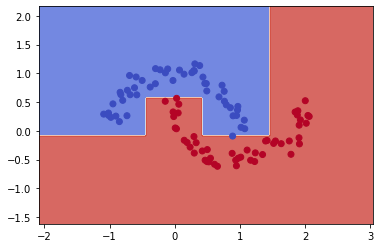

In [17]:
import numpy as np
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier

X, y = make_moons(n_samples=100, noise=0.10)

tree_clf = DecisionTreeClassifier(random_state=42)

tree_clf.fit(X, y)

plot_clf(tree_clf, X, y)

## Regresija

In [18]:
from sklearn.tree import DecisionTreeRegressor

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

export_graphviz(
  tree_reg,
  out_file='X^2.dot',
  rounded=True,
  filled=True
)

![Decision tree regressor on x^2](../img/x^2_tree.png)